<h1>🧽 Data Cleaning - Dataset C (3042-3879) 🧽</h1>

Perform data cleaning on a segment in Dataset C.

<h2>🗃 Import Libraries</h2>

In [1]:
#pip install geopandas matplotlib folium shapely

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import webbrowser

<h2>📤 Upload Dataset</h2>

In [3]:
C_Original_df = pd.read_csv("datasets\input\Dataset_C.csv")

<h2>🔍 Inspect Dataset</h2>

<h3>Check Data Types</h3>

In [4]:
C_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4421 entries, 0 to 4420
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Busines Model  4292 non-null   object 
 1   Category       4287 non-null   object 
 2   Subcategory    4284 non-null   object 
 3   Company Name   4392 non-null   object 
 4   Address        4287 non-null   object 
 5   Latitude       4284 non-null   object 
 6   Longitude      4284 non-null   object 
 7   State          4265 non-null   object 
 8   Country        4342 non-null   object 
 9   Contact No.    3986 non-null   object 
 10  Fax No.        2848 non-null   object 
 11  Website        4392 non-null   object 
 12  Email          15 non-null     object 
 13  Annual Sale    4286 non-null   object 
 14  Annual Sales   0 non-null      float64
 15  Employees      4275 non-null   object 
dtypes: float64(1), object(15)
memory usage: 552.8+ KB


<h3>Check For Null Values</h3>

In [5]:
C_Original_df.isnull().any()

Busines Model    True
Category         True
Subcategory      True
Company Name     True
Address          True
Latitude         True
Longitude        True
State            True
Country          True
Contact No.      True
Fax No.          True
Website          True
Email            True
Annual Sale      True
Annual Sales     True
Employees        True
dtype: bool

<h3>Summarize Dataset</h3>

In [6]:
C_Original_df.describe()

,Annual Sales
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<h3>Check Random Samples</h3>

In [7]:
C_Original_df.sample(5)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Annual Sales,Employees
1220,OEM,Material Handling Machinery,Material Handling Machinery,YAMAZEN CORPORATION - Kyoto Branch,"612-8445 Kyoto Prefecture, Kyoto City, Fushimi...",34.9539,135.7512,Kyoto,Japan,06-6534-3101,06-6532-2915,https://www.yamazen.co.jp/,NaN,"3,339,841,447.20",NaN,"3,276"
2853,OEM,Industrial Turnkey Plant,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Keihin Office","221-0052 11th floor, Yokohama Portside Buildin...",35.4656,139.6228,Kanagawa,Japan,(045) 440-1602,(045) 440-1604,https://www.ekkeagle.com/jp,NaN,"1,117,001,501.90",NaN,"6,280"
3181,OEM,Metal Forming Machinery,Molding Machine,"Shibaura Machine Co., Ltd. - Hamamatsu office","433-8117 5-6-25 Takaoka Higashi, Chuo-ku, Hama...",34.7000,137.7333,Shizuoka,Japan,053-436-7407,053-436-3996,https://www.shibaura-machine.co.jp/,NaN,"1,074,278,578.35",NaN,"3,507"
2749,End-user,Semiconductor,Semiconductor,KITZ - Tokai Sales Office,"Sumitomo Life Shizuoka Tokiwacho Building, 2-1...",34.9704,138.3841,Shizuoka,Japan,050-3649-3002,054-273-7336,https://www.kitz.co.jp/,NaN,"1,150,436,251.90",NaN,"5,382"
1128,OEM,Automatic Machinery & Equipment,Automatic Machinery & Equipment,YAMAZEN CORPORATION - Nagoya Branch,"456-8588 2-10-10 Shiratori, Atsuta-ku, Nagoya ...",35.1284,136.9064,Aichi,Japan,052-682-1239,052-682-5324,https://www.yamazen.co.jp/,NaN,"3,339,841,447.20",NaN,"3,276"


<h2>🧼 Clean Dataset</h2>

<h3>✂️ Remove Irrelevant Data</h3>

<h4>Slice Dataframe</h4>

In [8]:
C_df = C_Original_df.iloc[3042:3880]

<h4>Confirm Shape</h4>

In [9]:
C_df.shape

(838, 16)

<h4>Peek Dataframe</h4>

In [10]:
C_df.head(3)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Annual Sales,Employees
3042,OEM,Electric Machinery,Calibration Systems,"Eagle Industry Co., Ltd. - Marine Division Kur...","737-0027 No. 8 1 Showa-cho, Kure City, Hiroshi...",34.2506,132.5651,Hiroshima,Japan,(0823) 25-7121,(0823) 25-7120,https://www.ekkeagle.com/jp,NaN,"1,117,001,501.90",NaN,"6,280"
3043,OEM,Apparatus & Machinery for Chemical Industry,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(0834) 63-7648,(0834) 61-1054,https://www.ekkeagle.com/jp,NaN,"1,117,001,501.90",NaN,"6,280"
3044,OEM,Piping System,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(0834) 63-7648,(0834) 61-1054,https://www.ekkeagle.com/jp,NaN,"1,117,001,501.90",NaN,"6,280"


In [11]:
C_df.tail(3)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Annual Sales,Employees
3877,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Fukuoka Branch Office,810-0004 Fukuoka City Chuo Ward Watanabedori 2...,33.5828,130.4052,Fukuoka,Japan,092-731-0471,092-731-0955,https://www.seika.com/,NaN,"576,204,668.25",NaN,"1,040"
3878,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Kitakyushu Branch Office,"802-0001 KMM Building 2-14-1 Asano, Kokurakita...",33.8887,130.8835,Fukuoka,Japan,093-541-1127,093-541-1277,https://www.seika.com/,NaN,"576,204,668.25",NaN,"1,040"
3879,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Oita Branch Office,"9th floor, Nissei Oita Ekimae Building, 1-1-18...",33.2347,131.6061,Oita,Japan,097-534-1798,097-533-7494,https://www.seika.com/,NaN,"576,204,668.25",NaN,"1,040"


<h4>Remove Annual Sales Field</h4>

In [12]:
C_df = C_df.drop('Annual Sales', axis=1)

In [13]:
C_df.head(1)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3042,OEM,Electric Machinery,Calibration Systems,"Eagle Industry Co., Ltd. - Marine Division Kur...","737-0027 No. 8 1 Showa-cho, Kure City, Hiroshi...",34.2506,132.5651,Hiroshima,Japan,(0823) 25-7121,(0823) 25-7120,https://www.ekkeagle.com/jp,NaN,"1,117,001,501.90","6,280"


<h4>Remove Newline Characters</h4>

In [14]:
C_df = C_df.map(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

<h3>🕳 Handle Missing or Incomplete Data</h3>

<h4>Check Field Status</h4>

In [15]:
C_df.isnull().any()

Busines Model     True
Category         False
Subcategory      False
Company Name     False
Address          False
Latitude         False
Longitude        False
State             True
Country           True
Contact No.       True
Fax No.           True
Website          False
Email             True
Annual Sale      False
Employees         True
dtype: bool

In [16]:
C_df['Busines Model'].unique()

array(['OEM', 'End-user', nan], dtype=object)

<h4>Resolve Busines Model</h4>

In [17]:
null_rows = C_df[C_df['Busines Model'].isna()]

In [18]:
null_rows

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3754,NaN,Dryers,Drying/dehydration units,"Tsukishima Holdings Co., Ltd. - Osaka Branch","541-0048 No. 6, Kawaramachi 3-chome, Chuo-ku, ...",34.6862,135.5033,NaN,Japan,(06)6229-1331,(06)6229-1415,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3756,NaN,Pollution Control Equipment,Waste treatment support,"Tsukishima Holdings Co., Ltd. - Kansai Branch","541-0048 No. 6, Kawaramachi 3-chome, Chuo-ku, ...",34.6862,135.5033,NaN,Japan,(06)6229-1331,(06)6229-1415,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3766,NaN,Industrial Turnkey Plant,Large industrial equipment,"Tsukishima Holdings Co., Ltd. - Muroran Factory","051-0006 35-2 Chazu-cho, Muroran City, Hokkaido",42.3274,140.9892,NaN,Japan,(0143)57-1100,(0143)57-1102,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3767,NaN,Industrial Turnkey Plant,Welding and machining,"Tsukishima Holdings Co., Ltd. - Muroran Factory","051-0006 35-2 Chazu-cho, Muroran City, Hokkaido",42.3274,140.9892,NaN,Japan,(0143)57-1100,(0143)57-1102,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"


In [19]:
C_df['Busines Model'] = C_df['Busines Model'].fillna('OEM')

<h4>Resolve State</h4>

In [20]:
null_rows = C_df[C_df['State'].isna()]

In [21]:
null_rows

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3751,OEM,Pollution Control Equipment,Water treatment systems,"Tsukishima Holdings Co., Ltd. - East Japan Branch","104-0053 No. 5, Harumi 3-chome, Chuo-ku, Tokyo",35.7078,139.7795,NaN,Japan,(03)5560-6541,(03)5560-6593,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3752,OEM,"Planning, Consulting & Construction of Complet...",Engineering support for water,"Tsukishima Holdings Co., Ltd. - Kanto Branch","104-0053 No. 5, Harumi 3-chome, Chuo-ku, Tokyo",35.7078,139.7795,NaN,Japan,(03)5560-6542,(03)5560-6593,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3753,OEM,Dryers,Wastewater treatment systems,"Tsukishima Holdings Co., Ltd. - Osaka Branch","541-0048 No. 6, Kawaramachi 3-chome, Chuo-ku, ...",34.6862,135.5033,NaN,Japan,(06)6229-1331,(06)6229-1415,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3754,OEM,Dryers,Drying/dehydration units,"Tsukishima Holdings Co., Ltd. - Osaka Branch","541-0048 No. 6, Kawaramachi 3-chome, Chuo-ku, ...",34.6862,135.5033,NaN,Japan,(06)6229-1331,(06)6229-1415,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3755,OEM,Pollution Control Equipment,Municipal sewage,"Tsukishima Holdings Co., Ltd. - Kansai Branch","541-0048 No. 6, Kawaramachi 3-chome, Chuo-ku, ...",34.6862,135.5033,NaN,Japan,(06)6229-1331,(06)6229-1415,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3756,OEM,Pollution Control Equipment,Waste treatment support,"Tsukishima Holdings Co., Ltd. - Kansai Branch","541-0048 No. 6, Kawaramachi 3-chome, Chuo-ku, ...",34.6862,135.5033,NaN,Japan,(06)6229-1331,(06)6229-1415,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3757,OEM,"Planning, Consulting & Construction of Complet...",Regional support for water,"Tsukishima Holdings Co., Ltd. - Sapporo Branch","060-0807 1-2 Kitashichijo Nishi 4-chome, Kita-...",35.6556,139.7797,NaN,Japan,(011)726-0510,(011)726-0520,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3758,OEM,Pollution Control Equipment,Water treatment consulting,"Tsukishima Holdings Co., Ltd. - Sendai Branch","980-0014 11-2 Honmachi, Aoba-ku, Sendai (SK Se...",35.6563,139.7800,NaN,Japan,(022)227-9267,(022)223-0316,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3759,OEM,Pollution Control Equipment,Environmental plant engineering,"Tsukishima Holdings Co., Ltd. - Yokohama Branch","231-0012 1, 56 Aioicho 3-chome, Naka-ku, Yokoh...",35.6563,139.7800,NaN,Japan,(045)651-7331,(045)664-5086,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"
3760,OEM,Pollution Control Equipment,Sales and project support for treatment plants,"Tsukishima Holdings Co., Ltd. - Nagoya Branch","450-0003 No. 17, 29, Meieki Minami 1-chome, Na...",35.6563,139.7800,NaN,Japan,(052)581-2378,(052)581-1624,https://www.tsk-g.co.jp/,NaN,"824,652,887.25","3,517"


In [22]:
C_df.loc[3751:3752, 'State'] = 'Tokyo'
C_df.loc[3753:3757, 'State'] = 'Osaka'
C_df.loc[3758, 'State'] = 'Miyagi'
C_df.loc[3759, 'State'] = 'Kanagawa'
C_df.loc[3760, 'State'] = 'Kochi'
C_df.loc[3761, 'State'] = 'Hiroshima'
C_df.loc[3762, 'State'] = 'Fukuoka'
C_df.loc[3763, 'State'] = 'Okinawa'
C_df.loc[3764, 'State'] = 'Chiba'
C_df.loc[3765:3767, 'State'] = 'Hokkaido'
C_df.loc[3821:3822, 'State'] = 'Mie'

In [23]:
C_df.loc[3822]

Busines Model                                                  OEM
Category         Precision Machinery, Inspecting & Testing Equi...
Subcategory                                    Precision machining
Company Name          Sinfonia Technology Co., Ltd. - Toba Factory
Address            517-0011 1-19-1 Toba, Toba City, Mie Prefecture
Latitude                                                   34.4850
Longitude                                                 136.8279
State                                                          Mie
Country                                                      Japan
Contact No.                                           0599-25-3231
Fax No.                                               0599-25-5162
Website              https://www.sinfo-t.jp/company/business-base/
Email                                                          NaN
Annual Sale                                         681,586,018.65
Employees                                                    3

<h4>Resolve Country</h4>

In [24]:
C_df['Country'].unique()

array(['Japan', nan], dtype=object)

In [25]:
C_df['Country'] = C_df['Country'].fillna('Japan')

<h4>Resolve Contact No.</h4>

In [26]:
C_df['Contact No.'] = C_df['Contact No.'].fillna('')

<h4>Resolve Fax No.</h4>

In [27]:
C_df['Fax No.'] = C_df['Fax No.'].fillna('')

<h4>Resolve Email</h4>

In [28]:
C_df['Email'] = C_df['Email'].fillna('')

<h4>Resolve Employees</h4>

In [29]:
null_rows = C_df[C_df['Employees'].isna()]

In [30]:
null_rows

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3277,OEM,"Precision Machinery, Inspecting & Testing Equi...","Digital Modeling, CG, Optical analysis",Arrk Corporation - Head Office,"11th floor, Tatsuno Minamihonmachi Building, 2...",34.6789,135.5022,Osaka,Japan,,,https://jp.arrk.com/,,"79,378,900.00",NaN
3278,OEM,Productronics Machinery & Equipment,"Product design, Proof of Concept (POC)",Arrk Corporation - Tokyo Head Office,"1-7-1 Izumi, Asaka City, Saitama Prefecture, 3...",35.8008,139.6019,Saitama,Japan,048-458-5055,048-458-5532,https://jp.arrk.com/,,"79,378,900.00",NaN
3279,OEM,Industrial Machinery,"3D Printing, CNC Machining",Arrk Corporation - Head Office,"11th floor, Tatsuno Minamihonmachi Building, 2...",34.6789,135.5022,Osaka,Japan,,,https://jp.arrk.com/,,"79,378,900.00",NaN
3280,OEM,Casting,"Vacuum casting, Microwave molding",Arrk Corporation - Harajuku Factory,"770 Harajuku Ipponsugi, Hidaka City, Saitama P...",35.9086,139.3432,Saitama,Japan,,,https://jp.arrk.com/,,"79,378,900.00",NaN
3281,OEM,Productronics Machinery & Equipment,"Resin processing, Block molding",Arrk Corporation - Harajuku Factory,"770 Harajuku Ipponsugi, Hidaka City, Saitama P...",35.9086,139.3432,Saitama,Japan,,,https://jp.arrk.com/,,"79,378,900.00",NaN
3282,OEM,Productronics Machinery & Equipment,Sheet Metal Processing,Arrk Corporation - Fujiyoshida Factory,"2-12-8 Mukaihara, Fujiyoshida City, Yamanashi ...",35.4872,138.8067,Yamanashi,Japan,0555-24-1811,0555-20-1080,https://jp.arrk.com/,,"79,378,900.00",NaN
3283,OEM,Productronics Machinery & Equipment,"Simple mold, Injection molding, Small-scale pr...",Arrk Corporation - Fujiyoshida Factory,"2-12-8 Mukaihara, Fujiyoshida City, Yamanashi ...",35.4872,138.8067,Yamanashi,Japan,0555-24-1811,0555-20-1080,https://jp.arrk.com/,,"79,378,900.00",NaN
3284,OEM,Productronics Machinery & Equipment,Decoration/Surface treatment,Arrk Corporation - Fujiyoshida Factory,"2-12-8 Mukaihara, Fujiyoshida City, Yamanashi ...",35.4872,138.8067,Yamanashi,Japan,0555-24-1811,0555-20-1080,https://jp.arrk.com/,,"79,378,900.00",NaN
3285,OEM,Packaging Machinery,Packaging Solutions,Arrk Corporation - Osaka Branch Office,"2-4-3 Kawamocho, Tondabayashi City, Osaka Pref...",34.5004,135.5973,Osaka,Japan,0721-24-0403,0721-24-0455,https://jp.arrk.com/,,"79,378,900.00",NaN
3286,OEM,Subcontract Services,"A combination of design, engineering, prototyp...",Arrk Corporation - Fujiyoshida Factory,"2-12-8 Mukaihara, Fujiyoshida City, Yamanashi ...",35.4872,138.8067,Yamanashi,Japan,0555-24-1811,0555-20-1080,https://jp.arrk.com/,,"79,378,900.00",NaN


In [31]:
Employees_median = round(C_df['Employees'].str.replace(',', '').astype('Int64').median())
Str_Employees_median = str(Employees_median)

In [32]:
C_df['Employees'] = C_df['Employees'].fillna(Str_Employees_median)

In [33]:
C_df['Employees'] = C_df['Employees'].str.replace(',', '')

In [34]:
C_df['Employees'] = pd.to_numeric(C_df['Employees'], errors='coerce').astype('Int64')

<h4>Finalize Field Status</h4>

In [35]:
C_df.isnull().any()

Busines Model    False
Category         False
Subcategory      False
Company Name     False
Address          False
Latitude         False
Longitude        False
State            False
Country          False
Contact No.      False
Fax No.          False
Website          False
Email            False
Annual Sale      False
Employees        False
dtype: bool

<h3>⚠️ Fix Formatting Issues</h3>

<h4>Check DType</h4>

In [36]:
C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 3042 to 3879
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Busines Model  838 non-null    object
 1   Category       838 non-null    object
 2   Subcategory    838 non-null    object
 3   Company Name   838 non-null    object
 4   Address        838 non-null    object
 5   Latitude       838 non-null    object
 6   Longitude      838 non-null    object
 7   State          838 non-null    object
 8   Country        838 non-null    object
 9   Contact No.    838 non-null    object
 10  Fax No.        838 non-null    object
 11  Website        838 non-null    object
 12  Email          838 non-null    object
 13  Annual Sale    838 non-null    object
 14  Employees      838 non-null    Int64 
dtypes: Int64(1), object(14)
memory usage: 99.2+ KB


<h4>Change Latitude 'object' to 'float64'</h4>

In [37]:
C_df['Latitude'] = pd.to_numeric(C_df['Latitude'], errors='coerce').astype('float64')

<h4>Change Longitude 'object' to 'float64'</h4>

In [38]:
C_df['Longitude'] = pd.to_numeric(C_df['Longitude'], errors='coerce').astype('float64')

<h4>Change Annual Sale 'object' to 'float128'</h4>

In [39]:
C_df['Annual Sale'] = C_df['Annual Sale'].str.replace(',', '')

In [40]:
C_df['Annual Sale'] = pd.to_numeric(C_df['Annual Sale'], errors='coerce').astype('Float64')

<h4>Format Contact No.</h4>

In [41]:
C_df['Contact No.'] = C_df['Contact No.'].str.replace('-', '').str.replace('(', '').str.replace(')', '')

In [42]:
C_df['Contact No.'] = C_df['Contact No.'].str.slice_replace(start = 0, stop = 0, repl = '(')
C_df['Contact No.'] = C_df['Contact No.'].str.slice_replace(start = 3, stop = 3, repl = ')')
C_df['Contact No.'] = C_df['Contact No.'].str.slice_replace(start = 4, stop = 4, repl = ' ')
C_df['Contact No.'] = C_df['Contact No.'].str.slice_replace(start = 10, stop = 10, repl = '-')

In [43]:
C_df.sample(5)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3685,OEM,Agricultural Machinery,Agricultural Machinery,Taiho Kogyo,"3-65 Midorigaoka, Toyota City, Aichi Prefectur...",35.0640,137.1450,Aichi,Japan,(05) 65282-225,0565-28-2227,http://www.taihonet.co.jp/,,743910535.8,7104
3187,OEM,Automatic Machinery & Equipment,Extrusion Molding Machines,"Shibaura Machine Co., Ltd. - Hamamatsu office","433-8117 5-6-25 Takaoka Higashi, Chuo-ku, Hama...",34.7000,137.7333,Shizuoka,Japan,( 0) 53436-7407,053-436-3996,https://www.shibaura-machine.co.jp/,,1074278578.35,3507
3283,OEM,Productronics Machinery & Equipment,"Simple mold, Injection molding, Small-scale pr...",Arrk Corporation - Fujiyoshida Factory,"2-12-8 Mukaihara, Fujiyoshida City, Yamanashi ...",35.4872,138.8067,Yamanashi,Japan,(05) 55241-811,0555-20-1080,https://jp.arrk.com/,,79378900.0,2911
3296,OEM,"Tools, Cutters, Moulds, & Dies",Machine Tools,Fuji Machine Mfg,"19 Chausuyama, Yamamachi, Chiryu, Aichi 472-86...",35.0050,137.0552,Aichi,Japan,(81) 56681-2111,81-566-83-1140,https://www.fuji.co.jp/,,843601877.55,2911
3188,OEM,Heat Treatment Equipment,Extrusion Molding Machines,"Shibaura Machine Co., Ltd. - Hamamatsu office","433-8117 5-6-25 Takaoka Higashi, Chuo-ku, Hama...",34.7000,137.7333,Shizuoka,Japan,( 0) 53436-7407,053-436-3996,https://www.shibaura-machine.co.jp/,,1074278578.35,3507


In [44]:
C_df['Contact No.'] = C_df['Contact No.'].str.replace('() -', '')

<h4>Format Fax No.</h4>

In [45]:
C_df['Fax No.'] = C_df['Fax No.'].str.replace('-', '').str.replace('(', '').str.replace(')', '')

In [46]:
C_df['Fax No.'] = C_df['Fax No.'].str.slice_replace(start = 0, stop = 0, repl = '(')
C_df['Fax No.'] = C_df['Fax No.'].str.slice_replace(start = 3, stop = 3, repl = ')')
C_df['Fax No.'] = C_df['Fax No.'].str.slice_replace(start = 4, stop = 4, repl = ' ')
C_df['Fax No.'] = C_df['Fax No.'].str.slice_replace(start = 10, stop = 10, repl = '-')

In [47]:
C_df.sample(5)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3481,OEM,Forging & Stamping,Forging Press,"Kurimoto, Ltd. - Sakai Factory","14-1 Ishizu Nishimachi, Nishi-ku, Sakai City, ...",34.5614,135.4445,Osaka,Japan,(07) 22410-225,() -,https://www.kurimoto.co.jp/,,836072741.25,2121
3110,OEM,Machinery for Non-metallic Mineral Products,Machinery for Non-metallic Mineral Products,"Shibaura Machine Co., Ltd. - Shibaura Machine ...","100-8503 Fukoku Seimei Building 4F, 2-2-2 Uchi...",35.6711,139.7550,Tokyo,Japan,( 0) 33509-0200,(03) 35090-333,https://www.shibaura-machine.co.jp/,,1074278578.35,3507
3625,OEM,Subcontract Services,Group Management,"NICHIMO CO.,LTD.",140-0002 Tennozu Ocean Square 2-2-20 Higashish...,35.6238,139.7507,Tokyo,Japan,(03) 34583-020,(03) 34583-088,https://www.nichimo.co.jp/,,848229574.2,1043
3846,End-user,Energy,Energy,Seika Corp. - Hiroshima Branch Office,"7F Hiroshima Fukuromachi Building, 5-25 Fukuro...",34.3917,132.4570,Hiroshima,Japan,(08) 22485-831,(08) 22460-289,https://www.seika.com/,,576204668.25,1040
3819,OEM,Productronics Machinery & Equipment,Printing Systems,"Sinfonia Technology Co., Ltd. - Toyohashi Seis...","441-3195 150 Motoyashiki, Sanya-cho, Toyohashi...",34.7201,137.4596,Aichi,Japan,(05) 32412-121,(05) 32412-179,https://www.sinfo-t.jp/company/business-base/,,681586018.65,3683


In [48]:
C_df['Fax No.'] = C_df['Fax No.'].str.replace('() -', '')

<h4>Format Website</h4>

In [49]:
C_df['Website'] = C_df['Website'].str.replace('https://www.', '')
C_df['Website'] = C_df['Website'].str.replace('http://www.', '')

In [50]:
C_df.sample(5)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3355,OEM,Industrial Turnkey Plant,SMT pick and place machines,Fuji Machine Mfg - Okazaki Plant,"1-3 Kitayoko, Eta-cho, Okazaki, Aichi 444-2107...",35.0272,137.2092,Aichi,Japan,(81) 56445-2004,(81) 56445-8820,fuji.co.jp/,,843601877.55,2911
3346,OEM,Industrial Turnkey Plant,SMT pick and place machines,Fuji Machine Mfg - Toyota Plant,"484 Tojiri, Hasama-cho, Toyota, Aichi 470-0452...",35.2080,137.2683,Aichi,Japan,(81) 56576-2215,(81) 56576-5418,fuji.co.jp/,,843601877.55,2911
3849,End-user,Energy,Energy,Seika Corp. - Fukuoka Branch Office,810-0004 Fukuoka City Chuo Ward Watanabedori 2...,33.5828,130.4052,Fukuoka,Japan,(09) 27310-471,(09) 27310-955,seika.com/,,576204668.25,1040
3744,OEM,"Precision Machinery, Inspecting & Testing Equi...",CNC portal drilling machine,"Tsukishima Holdings Co., Ltd.","104-0053 3-5-1 Harumi, Chuo-ku, Tokyo",35.6556,139.7797,Tokyo,Japan,(03) 5560-6511,(03) 5560-6591,tsk-g.co.jp/,,824652887.25,3517
3084,OEM,Piping System,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Kyushu branch","812‐0013 2nd floor, Hakata Ekimae 2nd Building...",33.5903,130.4207,Fukuoka,Japan,(09) 2 710-7139,(09) 2 710-7158,ekkeagle.com/jp,,1117001501.9,6280


<h4>Finalize DType</h4>

In [51]:
C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 3042 to 3879
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Busines Model  838 non-null    object 
 1   Category       838 non-null    object 
 2   Subcategory    838 non-null    object 
 3   Company Name   838 non-null    object 
 4   Address        838 non-null    object 
 5   Latitude       838 non-null    float64
 6   Longitude      838 non-null    float64
 7   State          838 non-null    object 
 8   Country        838 non-null    object 
 9   Contact No.    838 non-null    object 
 10  Fax No.        838 non-null    object 
 11  Website        838 non-null    object 
 12  Email          838 non-null    object 
 13  Annual Sale    838 non-null    Float64
 14  Employees      838 non-null    Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 100.0+ KB


In [52]:
C_df.isnull().any()

Busines Model    False
Category         False
Subcategory      False
Company Name     False
Address          False
Latitude         False
Longitude        False
State            False
Country          False
Contact No.      False
Fax No.          False
Website          False
Email            False
Annual Sale      False
Employees        False
dtype: bool

In [53]:
C_df.tail(3)

,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees
3877,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Fukuoka Branch Office,810-0004 Fukuoka City Chuo Ward Watanabedori 2...,33.5828,130.4052,Fukuoka,Japan,(09) 27310-471,(09) 27310-955,seika.com/,,576204668.25,1040
3878,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Kitakyushu Branch Office,"802-0001 KMM Building 2-14-1 Asano, Kokurakita...",33.8887,130.8835,Fukuoka,Japan,(09) 35411-127,(09) 35411-277,seika.com/,,576204668.25,1040
3879,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Oita Branch Office,"9th floor, Nissei Oita Ekimae Building, 1-1-18...",33.2347,131.6061,Oita,Japan,(09) 75341-798,(09) 75337-494,seika.com/,,576204668.25,1040


<h3>🎏 Remove Duplicate Records</h3>

<h4>Check Current Shape of Dataframe</h4>

In [54]:
C_df.shape

(838, 15)

<h4>Count Duplicate Rows for Validation</h4>

In [55]:
duplicate_rows = C_df[C_df.duplicated()]
duplicate_rows.shape[0]

12

In [56]:
C_df = C_df.drop_duplicates(keep = 'first')

<h4>Check New Shape of Dataframe</h4>

In [57]:
C_df.shape

(826, 15)

<h3>🌐 Validate Geolocation Data</h3>

<h4>Get Country Borders</h4>

In [58]:
geo_df = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

In [59]:
country = geo_df[geo_df['name'] == 'Japan']

<h4>Convert To GeoDataFrame</h4>

In [60]:
C_df_copy = C_df

In [61]:
geo_df = gpd.GeoDataFrame(C_df_copy, geometry = gpd.points_from_xy(
    C_df_copy['Longitude'], C_df_copy['Latitude']), crs="EPSG:4326")

<h4>Check Coordinates</h4>

In [62]:
points_within = gpd.sjoin(geo_df, country, how='inner', predicate='within')

In [63]:
points_outside = geo_df[~geo_df.index.isin(points_within.index)]

In [64]:
print("Points inside the country:\n")
points_within

Points inside the country:



,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass
3043,OEM,Apparatus & Machinery for Chemical Industry,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(08) 34 63-7648,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3044,OEM,Piping System,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(08) 34 63-7648,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3045,OEM,Industrial Turnkey Plant,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(08) 34 63-7648,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3046,OEM,Pollution Control Equipment,Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(08) 34 63-7648,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3047,OEM,"Pumps, Fans, Compressors & Vacuum Pumps",Mechanical seal auxiliary equipment,"Eagle Industry Co., Ltd. - Hiroshima Branch Sh...","746-0024 2-20-3 Koizumi, Shunan, Yamaguchi",34.0421,131.8069,Yamaguchi,Japan,(08) 34 63-7648,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Tokuyama Branch Office,"745-0036 1-3 Honmachi, Shunan City, Yamaguchi ...",34.0527,131.8036,Yamaguchi,Japan,(08) 34214-407,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3876,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Yamaguchi Branch Office,"Ube Industries Building, 8-1 Aioicho, Ube City...",33.9548,131.2447,Yamaguchi,Japan,(08) 36220-191,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3877,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Fukuoka Branch Office,810-0004 Fukuoka City Chuo Ward Watanabedori 2...,33.5828,130.4052,Fukuoka,Japan,(09) 27310-471,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country
3878,OEM,Industrial Machinery,Industrial Machinery,Seika Corp. - Kitakyushu Branch Office,"802-0001 KMM Building 2-14-1 Asano, Kokurakita...",33.8887,130.8835,Fukuoka,Japan,(09) 35411-127,...,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country


In [65]:
print("Coordinates outside the country:")
points_outside

Coordinates outside the country:


,Busines Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sale,Employees,geometry
3042,OEM,Electric Machinery,Calibration Systems,"Eagle Industry Co., Ltd. - Marine Division Kur...","737-0027 No. 8 1 Showa-cho, Kure City, Hiroshi...",34.2506,132.5651,Hiroshima,Japan,(08) 23 25-7121,(08) 23 25-7120,ekkeagle.com/jp,,1117001501.9,6280,POINT (132.5651 34.2506)
3647,OEM,"Fishing, Animal & Husbandry Machinery",Marine Division,"NICHIMO CO.,LTD. - SHIMONOSEKI SALES OFFICE","750-0025 3-9-7 Takezakicho, Shimonoseki City, ...",33.9537,130.9213,Yamaguchi,Japan,(08) 32223-471,(08) 32327-216,nichimo.co.jp/,,848229574.2,1043,POINT (130.9213 33.9537)
3765,OEM,Industrial Turnkey Plant,Production of tanks,"Tsukishima Holdings Co., Ltd. - Muroran Factory","051-0006 35-2 Chazu-cho, Muroran City, Hokkaido",42.3274,140.9892,Hokkaido,Japan,(01) 43571-100,(01) 43571-102,tsk-g.co.jp/,,824652887.25,3517,POINT (140.9892 42.3274)
3766,OEM,Industrial Turnkey Plant,Large industrial equipment,"Tsukishima Holdings Co., Ltd. - Muroran Factory","051-0006 35-2 Chazu-cho, Muroran City, Hokkaido",42.3274,140.9892,Hokkaido,Japan,(01) 43571-100,(01) 43571-102,tsk-g.co.jp/,,824652887.25,3517,POINT (140.9892 42.3274)
3767,OEM,Industrial Turnkey Plant,Welding and machining,"Tsukishima Holdings Co., Ltd. - Muroran Factory","051-0006 35-2 Chazu-cho, Muroran City, Hokkaido",42.3274,140.9892,Hokkaido,Japan,(01) 43571-100,(01) 43571-102,tsk-g.co.jp/,,824652887.25,3517,POINT (140.9892 42.3274)
3789,OEM,Material Handling Machinery,Vibration Equipment,"Sinfonia Technology Co., Ltd. - Hokuriku Office","930-0004 Kitanihon Sakurabashi Building, 1-18 ...",36.9077,137.1961,Toyama,Japan,(07) 64324-551,(07) 64422-461,sinfo-t.jp/company/business-base/,,681586018.65,3683,POINT (137.1961 36.9077)
3807,OEM,Material Handling Machinery,Vibration Equipment,"Sinfonia Technology Co., Ltd. - Shimonoseki Of...","752-0953 14-1 Chofu Port Town, Shimonoseki",33.9692,131.0341,Yamaguchi,Japan,(08) 32464-555,,sinfo-t.jp/company/business-base/,,681586018.65,3683,POINT (131.0341 33.9692)
3808,OEM,Automatic Machinery & Equipment,FA Systems,"Sinfonia Technology Co., Ltd. - Shimonoseki Of...","752-0953 14-1 Chofu Port Town, Shimonoseki",33.9692,131.0341,Yamaguchi,Japan,(08) 32464-555,,sinfo-t.jp/company/business-base/,,681586018.65,3683,POINT (131.0341 33.9692)
3809,OEM,Electric Machinery,Power Electronics,"Sinfonia Technology Co., Ltd. - Shimonoseki Of...","752-0953 14-1 Chofu Port Town, Shimonoseki",33.9692,131.0341,Yamaguchi,Japan,(08) 32464-555,,sinfo-t.jp/company/business-base/,,681586018.65,3683,POINT (131.0341 33.9692)
3822,OEM,"Precision Machinery, Inspecting & Testing Equi...",Precision machining,"Sinfonia Technology Co., Ltd. - Toba Factory","517-0011 1-19-1 Toba, Toba City, Mie Prefecture",34.4850,136.8279,Mie,Japan,(05) 99253-231,(05) 99255-162,sinfo-t.jp/company/business-base/,,681586018.65,3683,POINT (136.8279 34.485)


In [66]:
points_within.shape[0]

805

In [67]:
points_outside.shape[0]

21

In [68]:
C_df.shape[0]

826

<h4>Visualization</h4>

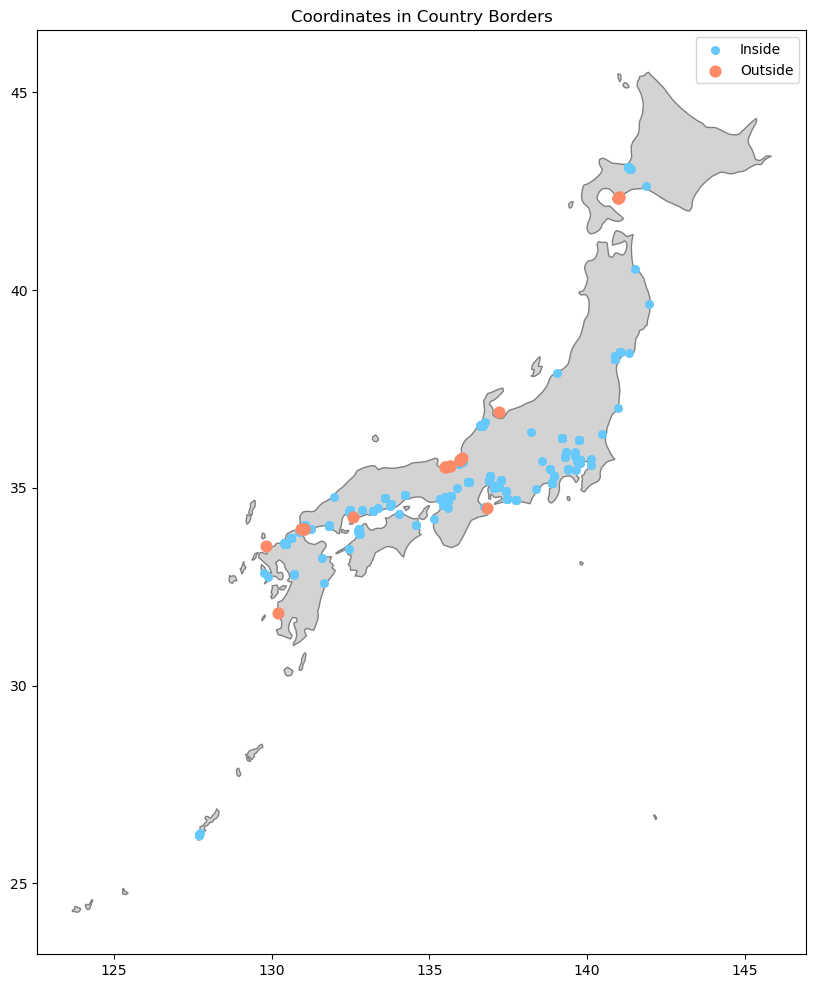

In [69]:
fig, ax = plt.subplots(figsize=(12, 12))
country.plot(ax=ax, color='lightgrey', edgecolor='grey')
points_within.plot(ax=ax, color='#67c8fc', markersize=30, label='Inside')
geo_df[~geo_df.index.isin(points_within.index)].plot(ax=ax, color='#fc8a67', markersize=60, label='Outside')

plt.title("Coordinates in Country Borders")
plt.legend()
plt.show()

<h4>Inspect Rows with Outside Coordinates</h4>

In [70]:
points_outside[['Company Name', 'Latitude', 'Longitude']].drop_duplicates()

,Company Name,Latitude,Longitude
3042,"Eagle Industry Co., Ltd. - Marine Division Kur...",34.2506,132.5651
3647,"NICHIMO CO.,LTD. - SHIMONOSEKI SALES OFFICE",33.9537,130.9213
3765,"Tsukishima Holdings Co., Ltd. - Muroran Factory",42.3274,140.9892
3789,"Sinfonia Technology Co., Ltd. - Hokuriku Office",36.9077,137.1961
3807,"Sinfonia Technology Co., Ltd. - Shimonoseki Of...",33.9692,131.0341
3822,"Sinfonia Technology Co., Ltd. - Toba Factory",34.4850,136.8279
3833,Seika Corp. - Muroran Branch Office,42.3545,141.0178
3838,Seika Corp. - Mihama Branch Office,35.7034,135.9716
3839,Seika Corp. - Oi Branch Office,35.5418,135.6554
3840,Seika Corp. - Takahama Branch Office,35.5215,135.5043


In [71]:
country_projected = country.to_crs("EPSG:3857")
centroid = country_projected.geometry.centroid.to_crs("EPSG:4326")
center_lat, center_lon = centroid.y.mean(), centroid.x.mean()

In [ ]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

folium.GeoJson(country).add_to(m)

for idx, row in points_outside.iterrows():
    color = 'lightblue' if idx in points_within.index else 'lightred'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Company Name'],
        icon=folium.Icon(color=color)
    ).add_to(m)

m.save('map.html')

In [ ]:
webbrowser.open('map.html',new = 2)

<h4>Correct Latitude and Longitude</h4>

<b>Before correcting the coordinates, check the `map.html` file to confirm. Sometimes, the Python calculations are not accurate.</b>

In [ ]:
# Sinfonia Technology Co., Ltd. - Shimonoseki Office
C_df.loc[C_df['Company Name'] == 'Sinfonia Technology Co., Ltd. - Shimonoseki Office', 
    ['Latitude', 'Longitude']] = [34.0067, 130.9972]

# Sinfonia Technology Co., Ltd. - Hokuriku Office
C_df.loc[C_df['Company Name'] == 'Sinfonia Technology Co., Ltd. - Hokuriku Office', 
    ['Latitude', 'Longitude']] = [36.6977, 137.2162]

<h4>Finalize Coordinates</h4>

In [ ]:
C_df_copy = C_df

In [ ]:
geo_df = gpd.GeoDataFrame(C_df_copy, geometry = gpd.points_from_xy(
    C_df_copy['Longitude'], C_df_copy['Latitude']), crs="EPSG:4326")

In [ ]:
points_within = gpd.sjoin(geo_df, country, how='inner', predicate='within')
points_outside = geo_df[~geo_df.index.isin(points_within.index)]

In [ ]:
country_projected = country.to_crs("EPSG:3857")
centroid = country_projected.geometry.centroid.to_crs("EPSG:4326")
center_lat, center_lon = centroid.y.mean(), centroid.x.mean()

In [ ]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

folium.GeoJson(country).add_to(m)

for idx, row in points_outside.iterrows():
    color = 'lightblue' if idx in points_within.index else 'lightred'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Company Name'],
        icon=folium.Icon(color=color)
    ).add_to(m)

m.save('map_corrected.html')

In [ ]:
webbrowser.open('map_corrected.html',new = 2)

<h3>📝 Correct Incorrect Entries</h3>

<h4>Resolve Busines Model</h4>

In [ ]:
C_df['Busines Model'].unique()

<h4>Resolve Category</h4>

In [ ]:
Categories = np.sort(C_df['Category'].unique())
Categories

In [ ]:
C_df.loc[C_df['Category'] == 'Chemical', 'Category'] = 'Apparatus & Machinery for Chemical Industry'
C_df['Category'] = C_df['Category'].str.replace('Industrial Turnkey Plant ','Industrial Turnkey Plant')
C_df.loc[C_df['Category'] == 'Semiconductor', 'Category'] = 'Semiconductor Machinery'
C_df.loc[C_df['Category'] == 'Electronic', 'Category'] = 'Electric Machinery'
C_df.loc[C_df['Category'] == 'Energy', 'Category'] = 'Electric Machinery'
C_df.loc[C_df['Category'] == 'Food', 'Category'] = 'Food Machinery'
C_df['Category'] = C_df['Category'].str.replace('\n','')
C_df.loc[C_df['Category'] == 'Precision Machinery', 'Category'] = 'Precision Machinery, Inspecting & Testing Equipment'

In [ ]:
Categories = np.sort(C_df['Category'].unique())

for i in Categories:
    print(i)

<h4>Resolve Subcategory</h4>

In [ ]:
C_df['Subcategory'] = C_df['Subcategory'].str.title()

In [ ]:
C_df['Subcategory'] = C_df['Subcategory'].str.replace(', And',' And')

In [ ]:
Subcategories = np.sort(C_df['Subcategory'].unique())

for i in Subcategories:
    print(i)

In [ ]:
C_df.loc[C_df['Subcategory'] == 'Bending Roll', 'Subcategory'] = 'Bending Rolls'
C_df.loc[C_df['Subcategory'] == 'Dredge Pump', 'Subcategory'] = 'Dredge Pumps'
C_df.loc[C_df['Subcategory'] == 'Power Electonics', 'Subcategory'] = 'Power Electronics'
C_df.loc[C_df['Subcategory'] == 'Product Design, Proof Of Concept (Poc)', 'Subcategory'] = 'Product Design'
C_df.loc[C_df['Subcategory'] == 'Semiconductor ', 'Subcategory'] = 'Semiconductor'
C_df.loc[C_df['Subcategory'] == 'Semiconductors', 'Subcategory'] = 'Semiconductor'
C_df.loc[C_df['Subcategory'] == 'Wastewaster Treatment Solution ', 'Subcategory'] = 'Wastewater Treatment Systems'

<h4>Resolve State</h4>

In [ ]:
C_df['State'].unique()

In [ ]:
C_df['State'] = C_df['State'].str.replace(' ', '', regex=True)

<h4>Resolve Country</h4>

In [ ]:
C_df['Country'].unique()

<h3>📈 Detect and Treat Outliers</h3>

In [ ]:
plt.style.use('fivethirtyeight')

<h4>Check Latitude</h4>

In [ ]:
plt.scatter(C_df['Latitude'], C_df['Latitude'], color='#fc67a5')
plt.show()

<h4>Check Longitude</h4>

In [ ]:
plt.scatter(C_df['Longitude'], C_df['Longitude'], color='#fc8a67')
plt.show()

<h4>Check Annual Sales</h4>

In [ ]:
plt.scatter(C_df['Annual Sale'], C_df['Annual Sale'], color='#67fcc8')
plt.show()

<h4>Check Employees</h4>

In [ ]:
plt.scatter(C_df['Employees'], C_df['Employees'], color='#67c8fc')
plt.show()

So far, there are <b>no outliers</b> in the dataset.

<h2>🔎 Finalize Dataset</h2>

<h3>Check Data Types</h3>

In [ ]:
C_df.info()

<h3>Check For Null Values</h3>

In [ ]:
C_df.isnull().any()

<h3>Summarize Dataset</h3>

In [ ]:
C_df.describe()

<h3>Check Random Samples</h3>

In [ ]:
C_df.sample(5)

<h2>📥 Download Dataset</h2>

In [ ]:
C_df.to_csv('datasets\output\Dataset_C_cleaned.csv', index=False)

<h2>💌 Credits ✉️</h2>

This project is done by <b>ERMITANO, Kate Justine</b> as a part of the internship tasks under the instructions of <b>Miss Fherlyn Charl Yet</b>.